In [3]:
import pandas as pd
import numpy as np
import mne_bids

##### Generate coordsystem.json for each sub-ses folder

In [14]:
import os
import json

root_path = 'dataset' # path to the dataset folder

coordsystem_content = {
    "EEGCoordinateSystem": "CapTrak",
    "EEGCoordinateUnits": "mm",
    "AnatomicalLandmarkCoordinates": {
        "NAS": [0, 103, -11],
        "LPA": [-83, 0, -11],
        "RPA": [83, 0, -11]
    },
    "AnatomicalLandmarkCoordinateUnits": "mm"
}

def save_json(file_path, data):
    with open(file_path, 'w') as fp:
        json.dump(data, fp, indent=4)

# generate one for each sub-ses folder
for subdir, dirs, files in os.walk(root_path):
    if subdir.endswith('eeg'):
        parts = subdir.split(os.sep)
        prefix = parts[-3] + '_' + parts[-2]
        json_file_path = os.path.join(subdir, f"{prefix}_coordsystem.json")
        save_json(json_file_path, coordsystem_content)
        print(f'coordsystem.json created at {json_file_path}')


coordsystem.json created at dataset/sub-13/ses-2/eeg/sub-13_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-13/ses-1/eeg/sub-13_ses-1_coordsystem.json
coordsystem.json created at dataset/sub-14/ses-2/eeg/sub-14_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-14/ses-1/eeg/sub-14_ses-1_coordsystem.json
coordsystem.json created at dataset/sub-22/ses-2/eeg/sub-22_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-22/ses-1/eeg/sub-22_ses-1_coordsystem.json
coordsystem.json created at dataset/sub-25/ses-2/eeg/sub-25_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-25/ses-1/eeg/sub-25_ses-1_coordsystem.json
coordsystem.json created at dataset/sub-71/ses-2/eeg/sub-71_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-71/ses-1/eeg/sub-71_ses-1_coordsystem.json
coordsystem.json created at dataset/sub-49/ses-2/eeg/sub-49_ses-2_coordsystem.json
coordsystem.json created at dataset/sub-49/ses-1/eeg/sub-49_ses-1_coordsystem.json
coor

In [5]:
# load one set of eeg data
bids_path = mne_bids.BIDSPath(subject='01', session='1', task='eyesclosed', datatype='eeg', root='dataset') # modify root to path to the data folder
raw = mne_bids.read_raw_bids(bids_path)
raw.load_data()
print(raw.info)

Reading /Users/sallyyu/Desktop/sleepdeprivation_COGS138/sleepdeprivation_COGS138/dataset/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading channel info from dataset/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesclosed_channels.tsv.
Reading electrode coords from dataset/sub-01/ses-1/eeg/sub-01_ses-1_electrodes.tsv.
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
 subject_info: 27 items (dict)
>


/var/folders/tj/l3z3723s3mjg78mm81dj0jqw0000gn/T/ipykernel_4477/2202148153.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-1_task-eyesclosed.

The search_str was "dataset/sub-01/**/eeg/sub-01_ses-1*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


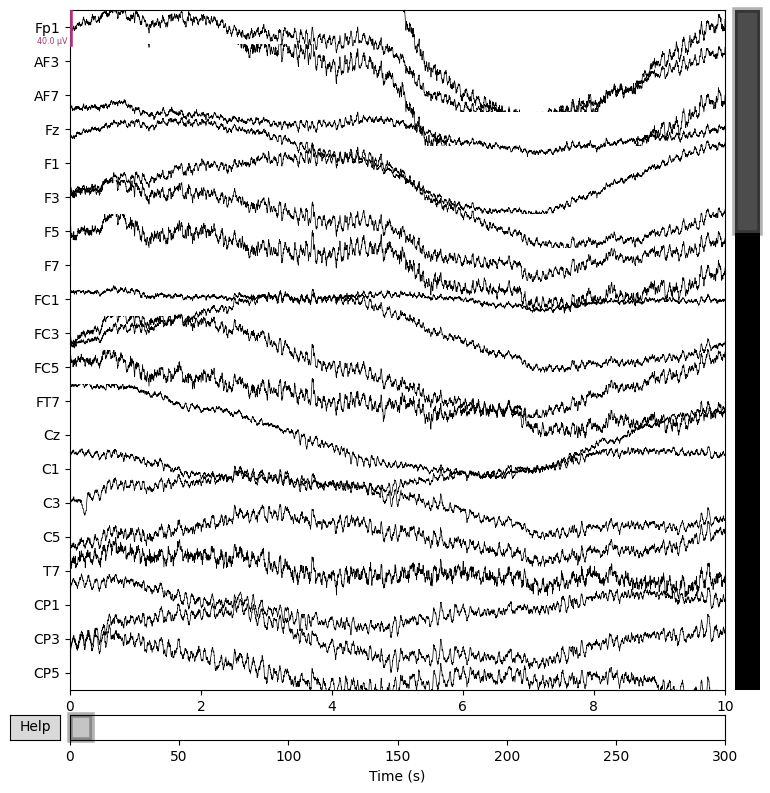

In [7]:
fig = raw.plot()